<a href="https://colab.research.google.com/github/Eunjung-Cho/Donduk-Ai-Learning-Crew/blob/main/Scalar/Crawling/naverCrawling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
search_word = "등교개학"  # 검색어 지정
title_list = []
 
def get_titles(start_num, end_num):
    #start_num ~ end_num까지 크롤링
    while 1:
        if start_num > end_num:
            break
        print(start_num)
 
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word,start_num)
        req = requests.get(url)
 
        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')
 
            # 뉴스제목 뽑아오기
            titles = soup.select(
                'ul.type01 > li > dl > dt > a'
            )
 
            # list에 넣어준다
            for title in titles:
                title_list.append(title['title'])
        start_num += 10
    print(title_list)

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
['방역당국 "등교개학 후 집단발병 가능성…저학년 더 우려"(종합)', '방역당국 "등교개학 후 집단발병 가능성 있어"', '고3 13일 우선 등교…나머지 학년은 5월20일∼6월1일 학교로', '[현장영상] 오는 13일 고3 학생부터 등교 수업…다음달 1일까지 순차 개학', '전국 초등교장 57% "등교개학 찬성"…반대는 33%', '"13일 고3부터 순차적으로 등교수업 시작"', '13일 고3부터 순차 등교…"시차 개학·2부제 수업도 가능"', '[속보]등교수업, 13일 고3부터···초등 1·2학년과 유치원은 20일 등교', "13일부터 초·중·고 순차 등교…개학 하자마자 '벼락치기 중간고사'", '고3 13일 등교...나머지 순차적으로', '이재정 경기교육감, "등교개학 후 손 씻기 교육과 훈련 철저히 해나갈 것"', "13일부터 초·중·고 순차 등교…개학 하자마자 '벼락치기 중간고사'", '[맞장토론] 순차 등교개학, 방역·교육현장·학부모 평가는?', '4단계 등교 개학, 고3은 13일 유치원은 20일', '등교개학 일정 4일 발표…고3부터 순차적 등교 유력', '등교 수업 오늘 발표...18일 이후 순차 등교 무게', '황금연휴 잠복기 끝나기 전 고3 등교 괜찮나…"전문가 자문과 다른 결론"', '고3 시작으로 13일부터 등교…초 1~2학년 20일', '때늦은 5월 등교, 미리 챙겨야할 우리 아이 건강은?', '고3 13일 등교...나머지 순차적으로', '[현장영상] "20일부터 순차적 등교 시작...고3은 13일 우선 등교"', '대입 준비 시급한 고3부터 13일 순차적 등교 시작', '13일에 고3 등교한다…나머지 순차 개학', '초중고생 19일부터 순차 등교…고3은 일주일 빨라질 가능성', '13일, 고등학교 3학년부터 순차적 등교 개학', '등교수업하면 교실 에어컨 켜지 못한다?', '교육부, 13일부터 등교 개학 추진...

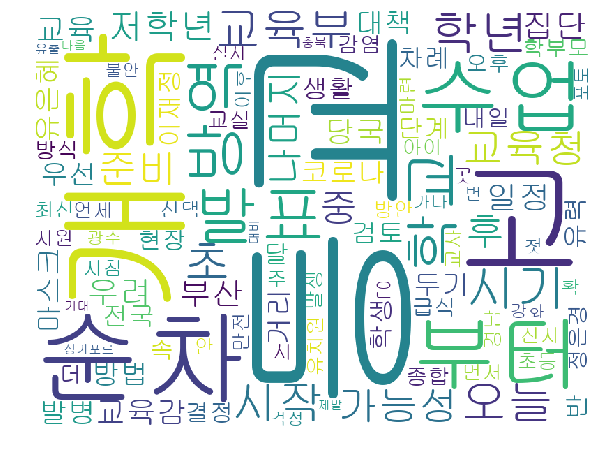

In [ ]:
def make_wordcloud(word_count):
    okt = Okt()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        
    print(sentences_tag)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)
 
    #wordCloud생성
    #한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path = 'C:\\Windows\\fonts\\gulim.ttc', background_color='white', width=800, height=600)
    print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
 
if __name__ == '__main__':
    #1~200번게시글 까지 크롤링
    get_titles(1,200)
 
    #단어 100개까지 wordcloud로 출력
    make_wordcloud(100)